In [1]:
using MultiPoly
using Interact
using ProfileView
using PyPlot

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [18]:
reload("SpatialFields")

INFO: Recompiling stale cache file /home/rdeits/.julia/lib/v0.4/SpatialFields.ji for module SpatialFields.


In [19]:
import SoftRobots
reload("SoftRobots")

INFO: Recompiling stale cache file /home/rdeits/.julia/lib/v0.4/SoftRobots.ji for module SoftRobots.


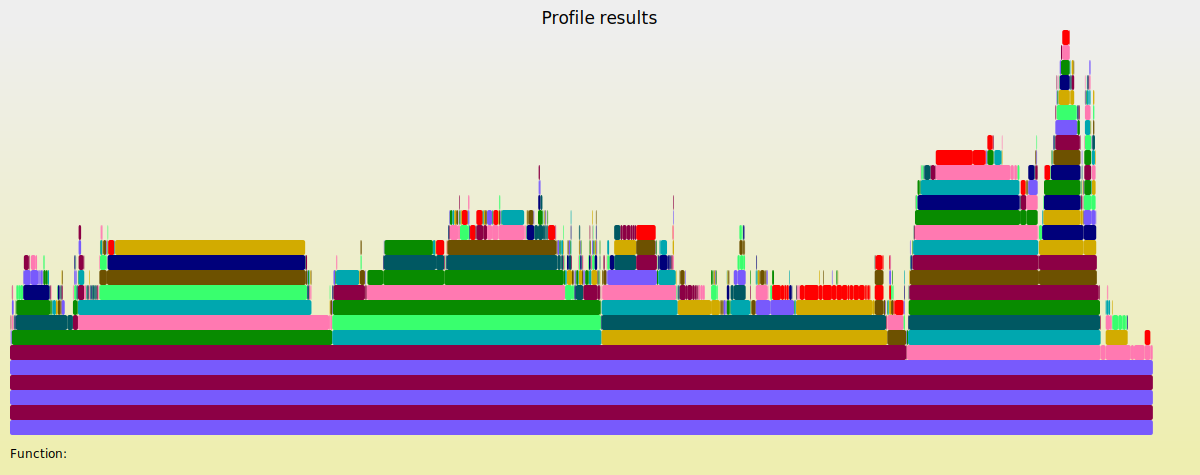

1.876452 seconds (11.43 M allocations: 504.537 MB, 13.27% gc time)


In [20]:
world = SoftRobots.World3D()
world_state = Dict{SoftRobots.Object, SoftRobots.ObjectState}()

robots = []
for j = 1:2
    robot, robot_state = SoftRobots.cube(k=1000)
#     robot, robot_state = SoftRobots.tetrahedron()
    push!(robots, robot)
    for i = 1:length(robot_state.positions)
        robot_state.positions[i] += SoftRobots.Point(0., 0, 1.0*j)
    end
    push!(world.objects, robot)
    world_state[robot] = robot_state
end

x, y, z = generators(MPoly{Float64}, :x, :y, :z)
terrain = SoftRobots.FixedObject()
terrain_state = SoftRobots.FixedObjectState(0 + (0.0x^2  + 0.0y^2 + 1z))
push!(world.objects, terrain)
world_state[terrain] = terrain_state

gl = [SoftRobots.LCMGLClient("robot$(i)") for i in 1:length(robots)]

function draw_callback(world, world_state)
    map(i -> SoftRobots.draw(gl[i], robots[i], world_state[robots[i]]), 1:length(robots))
    map(SoftRobots.switch_buffer, gl)
end

history = SoftRobots.simulate(world, world_state, 0:0.001:0.003, 
    draw_callback=draw_callback)
Profile.clear()
@time @profile history = SoftRobots.simulate(world, world_state, 0:0.001:2, 
draw_callback=(args...) -> nothing)
ProfileView.view()


In [13]:
@manipulate for i = 1:length(history)
    for j = 1:length(robots)
        SoftRobots.draw(gl[j], robots[j], history[i][2][robots[j]])
        SoftRobots.switch_buffer(gl[j])
    end
end

Interact.Slider{Int64}(Signal{Int64}(1000, nactions=0),"i",1000,1:2000,true)

nothing